In [2]:
    # dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')


import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
    # process
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
    # process
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
res_sql = pd.read_sql("select count(*) from measurement", con=engine)
print (res_sql)

   count(*)
0     19550


In [4]:
    # process
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [5]:
    # process
# Save references to each table
measures = base.classes.measurement
station = base.classes.station

In [6]:
    # process
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [7]:
    # process
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
res_df=[]

# Calculate the date one year from the last date in data set.
prv_yyyy = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
session.query(measures.date, measures.prcp)



In [8]:
    # inspection
res_ls = session.query(measures.date, measures.prcp).filter(measures.date >= prv_yyyy).all()
print(res_ls)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [9]:
    # process
# Save the query results as a Pandas DataFrame and set the index to the date column
res_df = pd.DataFrame(res_ls, columns=['date','precip'])



In [10]:
    # inspection
res_df

,date,precip
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [11]:
res_df.set_index(res_df['date'], inplace=True)

In [12]:
    # inspection
res_df

,date,precip
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


In [13]:
# Sort the dataframe by date
res_df.sort_index()

,date,precip
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [14]:
    # inspection
print(res_df.to_string(index=False))

      date  precip
2016-08-23    0.00
2016-08-24    0.08
2016-08-25    0.08
2016-08-26    0.00
2016-08-27    0.00
2016-08-28    0.01
2016-08-29    0.00
2016-08-30    0.00
2016-08-31    0.13
2016-09-01    0.00
2016-09-02    0.00
2016-09-03    0.00
2016-09-04    0.03
2016-09-05     NaN
2016-09-06     NaN
2016-09-07    0.05
2016-09-08    0.00
2016-09-09    0.03
2016-09-10    0.00
2016-09-11    0.05
2016-09-12    0.00
2016-09-13    0.02
2016-09-14    1.32
2016-09-15    0.42
2016-09-16    0.06
2016-09-17    0.05
2016-09-18    0.00
2016-09-19    0.00
2016-09-20    0.00
2016-09-21    0.00
2016-09-22    0.02
2016-09-23    0.00
2016-09-24    0.00
2016-09-25    0.00
2016-09-26    0.06
2016-09-27    0.02
2016-09-28    0.00
2016-09-29    0.00
2016-09-30    0.00
2016-10-01    0.00
2016-10-02    0.00
2016-10-03    0.00
2016-10-04    0.00
2016-10-05    0.00
2016-10-06    0.00
2016-10-07    0.00
2016-10-08    0.00
2016-10-09    0.00
2016-10-10    0.00
2016-10-11    0.00
2016-10-12    0.00
2016-10-13  

<AxesSubplot:xlabel='date'>

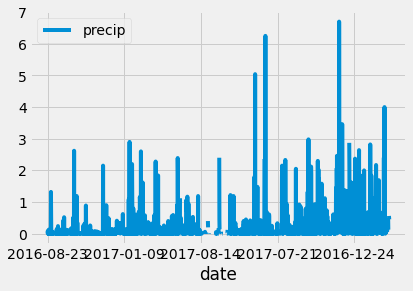

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
res_df.plot()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
res_df.describe()

,precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# How many stations are available in this dataset?
session.query(func.count(station.station)).all()

[(9,)]

In [18]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(measures.station, func.count(measures.station)).group_by(measures.station).order_by(func.count(measures.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(measures.tobs), func.max(measures.tobs), func.avg(measures.tobs)).filter(measures.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
res_filt_df  = session.query(measures.tobs).filter(measures.station == 'USC00519281').filter(measures.date >= prv_yyyy).all()
print(res_filt_df)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [25]:
res_filt_df = pd.DataFrame(res_filt_df, columns=['tobs'])
print(res_filt_df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

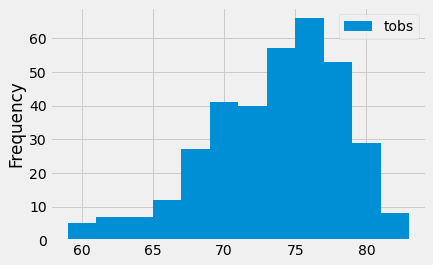

In [26]:
res_filt_df.plot.hist(bins=12)
plt.tight_layout


In [27]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_t(st_date, ed_date):
    x = session.query(func.min(measures.tobs), func.max(measures.tobs), func.avg(measures.tobs)).filter(measures.date >= st_date).filter(measures.date <= ed_date).all()
    return x


# Challenge